<a href="https://colab.research.google.com/github/EdEnsta/IN104_Edgar_Pereyron_Thea_Levidileon/blob/main/Shap_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Préparation de l'envrionnement et mise en forme de la table de données

Cette partie est similaire à celle effectuée sur le fichier concernant l'interprétation de prédictions sur données tabulaires avec Lime. Nous ne reécrivons pas tous les commentaires, pour plus de détail consulter l'autre fichier.

------------------------------------------------------------------------

This part is similar to the one done on the file concerning the interpretation of predictions on tabular data with Lime. We do not rewrite all the comments, for more details consult the other file.

     |████████████████████████████████| 358kB 5.3MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491626 sha256=3065849b4ca7ee3bd0f4072a92f1c22d8228a6ea9468630db341224624197ebe
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap


Saving titanic_setfinal.csv to titanic_setfinal.csv


Saving titanic_testfinal.csv to titanic_testfinal.csv
Le fichier a 702 lignes et 14 colonnes

PassengerId           int64
Survived              int64
Pclass                int64
Name                 object
Sex                  object
Age                   int64
SibSp                 int64
Parch                 int64
Ticket               object
Fare                float64
Cabin                object
Embarked             object
Encoded_Sex           int64
Encoded_Embarked      int64
dtype: object



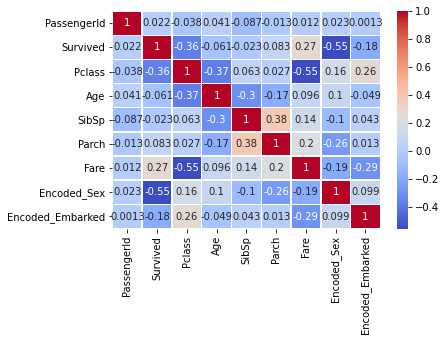

In [1]:
!pip install shap
from numpy import*
import matplotlib.pyplot as plt
import xgboost
import sklearn
import shap
import seaborn as sns
import pandas as pd
import  pandas_profiling
import string
import os
import pickle
import re
import time
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from IPython.core.display import HTML
%matplotlib inline 


from google.colab import files
files.upload()
from google.colab import files
files.upload()


df = pd.read_csv("titanic_setfinal.csv")
print("Le fichier a " + str(df.shape[0]) + " lignes et " + str(df.shape[1]) + " colonnes",end='\n')
print()

#liste des données et leur type
print(df.dtypes, end='\n')
print()

#Analyse des corrélations
cor = df.corr()
sns.heatmap(cor, cmap="coolwarm",linewidth=.5,annot=True)
plt.show()

#suppresion des colonnes non significative
df.drop(columns = ['PassengerId','Name','Ticket','Cabin','Sex','Embarked'],axis=1,inplace=True)

#stockage de la variable cible
cible = df['Survived']

#suppresion de survived du dataset
df.drop('Survived',axis=1,inplace = True)

#conservation des noms des variables
liste_variables = list(df.columns)

# Entraînement et explications du modèle

In [2]:
#entraînement du premier modèle
first_model = xgboost.train({"learning_rate": 0.01, "seed":100}, xgboost.DMatrix(array(df), label=array(cible)), 100)

In [3]:
#explications du modèle en utilisant la librairie shap et les shap values
explainer = shap.TreeExplainer(first_model)
shap_values = explainer.shap_values(array(df))

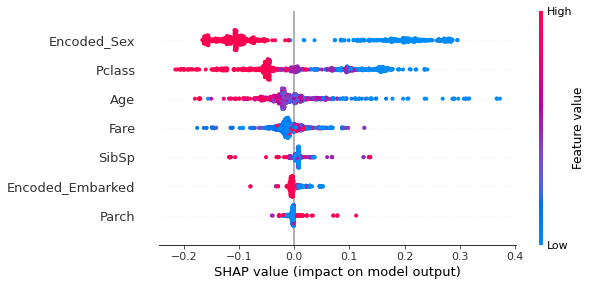

In [4]:
shap.summary_plot(shap_values,df)
shap.initjs()

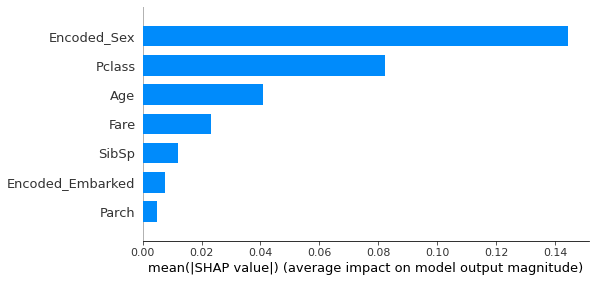

In [5]:
shap.summary_plot(shap_values,df,plot_type="bar")
shap.initjs()

In [11]:
#explication d'une instance en particulier
shap.initjs() 
shap.force_plot(explainer.expected_value,shap_values[14],df.iloc[14])


# Test sur un second modèle 

On utilise de nouveau un algorithme issue de la librairie xgboost.

------------------------------------------------------------------------

We use again an algorithm from the xgboost library.

In [7]:
from xgboost import XGBClassifier

second_model = XGBClassifier(random_state = 42)

#entraînement du second modèle
second_model.fit(array(df),array(cible))


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

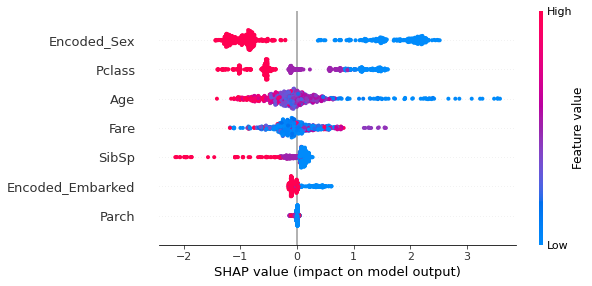

In [8]:
#explication via shap
explainer_2 = shap.TreeExplainer(second_model)
shap_values_2 = explainer_2.shap_values(array(df))

shap.summary_plot(shap_values_2,df)
shap.initjs()

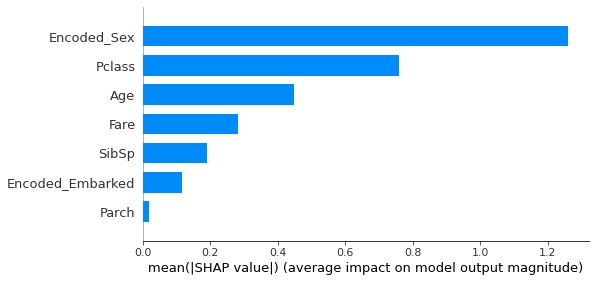

In [9]:
shap.summary_plot(shap_values_2,df,plot_type="bar")
shap.initjs()

On observe que l'impact des variables suit environ le même ordre pour les deux modèles, seule la valeur de leur impact change sur la décision du modèle.

------------------------------------------------------------------------

We observe that the impact of the variables follows approximately the same order for both models, only the value of their impact changes on the model decision.

In [12]:
#explication d'une instance en particulier
shap.initjs() 
shap.force_plot(explainer_2.expected_value,shap_values_2[14],df.iloc[14])
